In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn.externals import joblib
import seaborn as sns

%matplotlib inline
sns.set(style="white", color_codes=True, context="notebook", font_scale=1.4)

mainpath = '/Users/jorgetil/Astro/HITS'

In [3]:
candidates = pd.read_csv('%s/tables/HiTS_all_candidates_from_RFC_hierar_var5.csv'
                        % (mainpath))
candidates.set_index('Unnamed: 0', inplace=True)
#candidates.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
candidates.head()

,Var_prob,Pred_Var_Type_05,Per_prob,Pred_VarPer_Type,DSCT,EB,ROTVAR,RRLYR,Pred_VarPerSub_Type,CV,QSO,SNe,Pred_VarNonPerSub_Type,Pred_class
Unnamed: 0,,,,,,,,,,,,,,
Blind14A_01_N10_0080_2020,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0151_0857,0.007529,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0169_1107,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0251_2356,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0280_0759,0.007529,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV


In [5]:
candidates.Pred_class.value_counts()

NV        2532615
QSO          1890
ROTVAR        654
EB            372
CV            250
RRLYR         195
DSCT           95
SNe            29
Name: Pred_class, dtype: int64

(array([  2.25481700e+06,   2.26626000e+05,   4.04570000e+04,
          7.87600000e+03,   2.83900000e+03,   1.46500000e+03,
          7.21000000e+02,   4.77000000e+02,   3.24000000e+02,
          4.98000000e+02]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

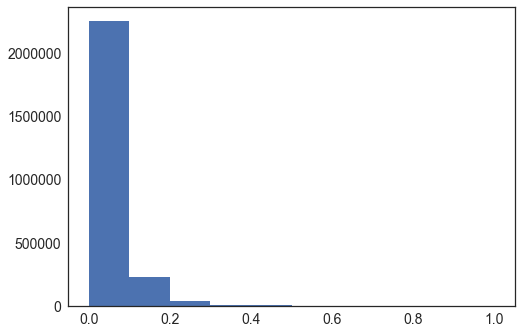

In [6]:
plt.hist(candidates.Var_prob)

In [7]:
NV = candidates[candidates.Var_prob < .2]
DSCT = candidates[candidates.DSCT > .8]
EB = candidates[candidates.EB > .8]
ROTVAR = candidates[candidates.ROTVAR > .8]
RRLYR = candidates[candidates.RRLYR > .8]
CV = candidates[candidates.CV > .8]
QSO = candidates[candidates.QSO > .8]
SNe = candidates[candidates.SNe > .8]

above_thresh = pd.concat([NV, DSCT, EB, ROTVAR, RRLYR, CV, QSO, SNe])
print above_thresh.shape

(2482255, 14)


In [8]:
above_thresh.Pred_class.value_counts()

NV        2481443
QSO           630
RRLYR          90
ROTVAR         48
EB             39
CV              3
SNe             1
DSCT            1
Name: Pred_class, dtype: int64

In [9]:
summary = pd.DataFrame(dtype=int)
print summary

Empty DataFrame
Columns: []
Index: []


In [10]:
for label in sorted(set(candidates.Pred_class)):
    print label
    only = candidates.query('Pred_class == "%s"' % (label))
    print only.shape
    if label == 'NV':
        probas = 1 - only.Var_prob
    else:
        probas = only['%s' % label]
    summary.loc[label, '>50'] = len(probas[probas >= .5])
    summary.loc[label, '>60'] = len(probas[probas >= .6])
    summary.loc[label, '>70'] = len(probas[probas >= .7])
    summary.loc[label, '>80'] = len(probas[probas >= .8])
    summary.loc[label, '>90'] = len(probas[probas >= .9])
    if False:
        plt.hist(probas, cumulative=True, histtype='step', bins=20, lw=2)
        plt.show()

CV
(250, 14)
DSCT
(95, 14)
EB
(372, 14)
NV
(2532615, 14)
QSO
(1890, 14)
ROTVAR
(654, 14)
RRLYR
(195, 14)
SNe
(29, 14)


In [11]:
summary.loc['Periodic', '>50'] = len(candidates[candidates.Per_prob >= .5])
summary.loc['Periodic', '>60'] = len(candidates[candidates.Per_prob >= .6])
summary.loc['Periodic', '>70'] = len(candidates[candidates.Per_prob >= .7])
summary.loc['Periodic', '>80'] = len(candidates[candidates.Per_prob >= .8])
summary.loc['Periodic', '>90'] = len(candidates[candidates.Per_prob >= .9])

summary.loc['NonPeriodic', '>50'] = len(candidates[candidates.Per_prob < .5])
summary.loc['NonPeriodic', '>60'] = len(candidates[candidates.Per_prob < .4])
summary.loc['NonPeriodic', '>70'] = len(candidates[candidates.Per_prob < .3])
summary.loc['NonPeriodic', '>80'] = len(candidates[candidates.Per_prob < .2])
summary.loc['NonPeriodic', '>90'] = len(candidates[candidates.Per_prob < .1])



summary.loc['Variable', '>50'] = len(candidates[candidates.Var_prob >= .5])
summary.loc['Variable', '>60'] = len(candidates[candidates.Var_prob >= .6])
summary.loc['Variable', '>70'] = len(candidates[candidates.Var_prob >= .7])
summary.loc['Variable', '>80'] = len(candidates[candidates.Var_prob >= .8])
summary.loc['Variable', '>90'] = len(candidates[candidates.Var_prob >= .9])

In [12]:
to_latex = summary.loc[['Variable','NV','Periodic','NonPeriodic','DSCT','EB','ROTVAR','RRLYR','CV','QSO','SNe'],
            ['>90','>80','>70','>60','>50']].astype(dtype=int)
print to_latex.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &      >90 &      >80 &      >70 &      >60 &      >50 \\
\midrule
Variable    &      498 &      822 &     1361 &     2130 &     3485 \\
NV          &  2325011 &  2488889 &  2521900 &  2530130 &  2532615 \\
Periodic    &      234 &      397 &      619 &      944 &     1321 \\
NonPeriodic &      432 &      893 &     1326 &     1769 &     2164 \\
DSCT        &        1 &        3 &        7 &       20 &       43 \\
EB          &       12 &       60 &      114 &      194 &      289 \\
ROTVAR      &       14 &       66 &      156 &      342 &      538 \\
RRLYR       &       70 &       97 &      111 &      133 &      144 \\
CV          &        0 &        3 &       24 &       95 &      236 \\
QSO         &      231 &      747 &     1261 &     1641 &     1849 \\
SNe         &        0 &        1 &        4 &        8 &       17 \\
\bottomrule
\end{tabular}



In [13]:
print len(candidates[candidates.Var_prob == .5])
print len(candidates)

188
2536100


In [14]:
summary.astype(dtype=int)

,>50,>60,>70,>80,>90
CV,236,95,24,3,0
DSCT,43,20,7,3,1
EB,289,194,114,60,12
NV,2532615,2530130,2521900,2488889,2325011
QSO,1849,1641,1261,747,231
ROTVAR,538,342,156,66,14
RRLYR,144,133,111,97,70
SNe,17,8,4,1,0
Periodic,1321,944,619,397,234
NonPeriodic,2164,1769,1326,893,432
